<div style="text-align: right"><sub>This notebook is distributed under the <a href="https://creativecommons.org/licenses/by-sa/4.0/" target="_blank">Attribution-ShareAlike 4.0 International (CC BY-SA 4.0) license</a>.</sub></div>
<h1>Hands on Machine Learning  <span style="font-size:12px;"><i>by <a href="https://webgrec.ub.edu/webpages/tmp/cat/dmaluenda.ub.edu.html" target="_blank">David Maluenda</a></i></span></h1>

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a href="https://atenea.upc.edu/course/view.php?id=71605" target="_blank">
      <img src="https://github.com/dmaluenda/hands_on_machine_learning/raw/master/resources/upc_logo_49px.png" width="130"/>
    </a>
  </td>
  <td>
  </td>
  <td>   <!-- gColab -->
    <a href="https://colab.research.google.com/github/dmaluenda/hands_on_machine_learning/blob/master/02_Training.ipynb" target="_blank">
      <img src="https://raw.githubusercontent.com/dmaluenda/hands_on_machine_learning/master/resources/colab_logo_32px.png" />
      Run in Google Colab
    </a>
  </td>
  <td>   <!-- github -->
    <a href="https://github.com/dmaluenda/hands_on_machine_learning/blob/master/02_Training.ipynb" target="_blank">
      <img src="https://raw.githubusercontent.com/dmaluenda/hands_on_machine_learning/master/resources/github_logo_32px.png" />
      View source on GitHub
    </a>
  </td>
  <td>   <!-- download -->
    <a href="https://raw.githubusercontent.com/dmaluenda/hands_on_machine_learning/master/02_Training.ipynb"  target="_blank"
          download="02_Training">
      <img src="https://raw.githubusercontent.com/dmaluenda/hands_on_machine_learning/master/resources/download_logo_32px.png" />
      Download notebook
      </a>
  </td>
</table>

# $\text{II}$. Training Neural Networks with Pure Python

Hands on "Machine Learning on Classical and Quantum data" course of
[Master in Photonics - PHOTONICS BCN](https://photonics.masters.upc.edu/en/general-information)
[[UPC](https://photonics.masters.upc.edu/en) +
[UB](https://www.ub.edu/web/ub/en/estudis/oferta_formativa/master_universitari/fitxa/P/M0D0H/index.html?) +
[UAB](https://www.uab.cat/en/uab-official-masters-degrees-study-guides/) +
[ICFO](https://www.icfo.eu/lang/studies/master-studies)].

Tutorial 2

This notebook shows how to:
- implement a stochastic gradient descent to fit an arbitrary function
- implement backpropagation in pure python
- train a deep fully connected net to reproduce an image

**References**:

[1] [Machine Learning for Physicists](https://machine-learning-for-physicists.org/) by Florian Marquardt.<br>
[2] [NumPy](https://numpy.org/doc/stable/user/whatisnumpy.html): the fundamental package for scientific computing in Python.<br>
[3] [Matplotlib](https://matplotlib.org/stable/tutorials/introductory/usage.html): a comprehensive library for creating static, animated, and interactive visualizations in Python.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports:-only-numpy-and-matplotlib" data-toc-modified-id="Imports:-only-numpy-and-matplotlib-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Imports: only numpy and matplotlib</a></span></li><li><span><a href="#Curve-fitting-(base-for-training)" data-toc-modified-id="Curve-fitting-(base-for-training)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Curve fitting (base for training)</a></span><ul class="toc-item"><li><span><a href="#Function-definition-and-fitting-model" data-toc-modified-id="Function-definition-and-fitting-model-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Function definition and fitting model</a></span></li><li><span><a href="#Cost-function" data-toc-modified-id="Cost-function-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Cost function</a></span></li><li><span><a href="#Stochastic-gradient-descent" data-toc-modified-id="Stochastic-gradient-descent-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Stochastic gradient descent</a></span></li><li><span><a href="#[HOMEWORK]:-Your-own-examples" data-toc-modified-id="[HOMEWORK]:-Your-own-examples-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>[HOMEWORK]: Your own examples</a></span></li></ul></li><li><span><a href="#Backpropagation" data-toc-modified-id="Backpropagation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Backpropagation</a></span><ul class="toc-item"><li><span><a href="#Implement-backpropagation-for-a-general-(fully-connected)-network" data-toc-modified-id="Implement-backpropagation-for-a-general-(fully-connected)-network-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Implement backpropagation for a general (fully connected) network</a></span></li><li><span><a href="#Setup-for-a-particular-set-of-layer-sizes" data-toc-modified-id="Setup-for-a-particular-set-of-layer-sizes-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Setup for a particular set of layer sizes</a></span></li><li><span><a href="#Train-the-net-on-one-single-batch-repeatedly-(not-so-good)" data-toc-modified-id="Train-the-net-on-one-single-batch-repeatedly-(not-so-good)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Train the net on one single batch repeatedly (not so good)</a></span></li><li><span><a href="#Produce-random-batches:-randomly-sample-a-function-defined-on-a-2D-square" data-toc-modified-id="Produce-random-batches:-randomly-sample-a-function-defined-on-a-2D-square-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Produce random batches: randomly sample a function defined on a 2D square</a></span></li></ul></li><li><span><a href="#Train-net-to-reproduce-an-image" data-toc-modified-id="Train-net-to-reproduce-an-image-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Train net to reproduce an image</a></span></li></ul></div>

## Imports: only numpy and matplotlib

In [1]:
# get the "numpy" library for linear algebra
import numpy as np

# get "matplotlib" for plotting
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.dpi'] = 300  # highres display
from matplotlib.axes._axes import _log as mpl_ax_logger
mpl_ax_logger.setLevel('ERROR')  # ignore warnings


# for nice inset colorbars:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# time control to count it and manage it
from time import time, sleep

# For simple animation
from IPython.display import clear_output

## Curve fitting (base for training)

This section shows how stochastic gradient descent can help to fit an arbitrary function (neural networks essentially do that, but in much higher dimensions and with many more parameters)

### Function definition and fitting model

Let's define a non linear function to fit.

For instance

$$f(x) = \frac{\theta_0}{(x - \theta_1)^2 + 1}$$

where $\theta_0$ and $\theta_1$ are free parameters.

In [2]:
def f(theta, x):
    """ theta are the parameters
        x are the input values (can be an array)
    """
    return theta[0] / ( (x-theta[1])**2 + 1.0 )

Let's define a certain target functions by selecting some values fot $\theta_0$ amd $\theta_1$. This two values are what we want to estimate

In [3]:
true_thetas = [3.0, 0.5]

Let's initialize our fitting by taking arbitrary parameters

In [4]:
fit_thetas = [0.5, 1.8]

Let's define a function to get randomly sampled $x$ values

In [5]:
def samples(nsamples, width=2.0):
    """ return an array of nsamples values mostly from -width to width. """
    return width * np.random.randn(nsamples)

Let's illustrate the parametrized function at some sampled points to compare against actual function

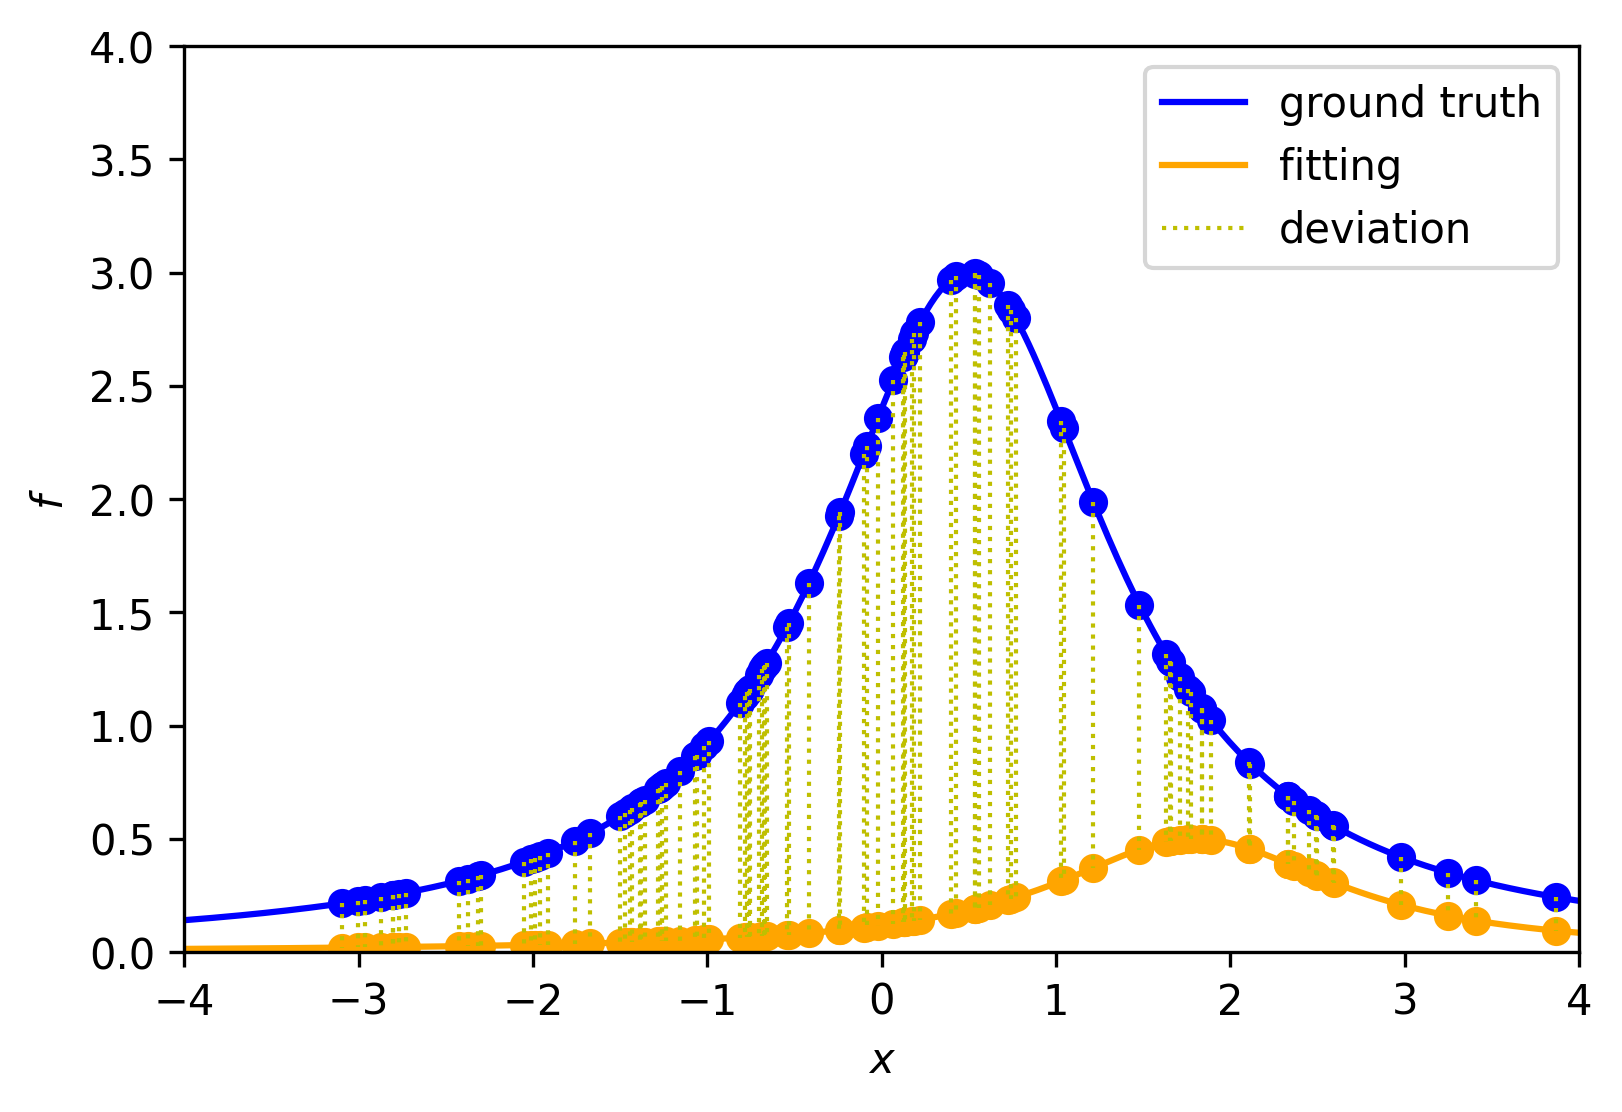

In [6]:
x = samples(100)

def plot_curves(x, ax=None):
    ax = plt.gca() if ax==None else ax
    
    x_line = np.linspace(-4, 4, 300)
    ax.plot(x_line, f(true_thetas, x_line),color="blue")
    ax.plot(x_line, f(fit_thetas, x_line),color="orange")
    
    true_points = f(true_thetas, x)
    fit_points = f(fit_thetas, x)
    
    for idx in range(len(x)):
        ax.plot([x[idx], x[idx]], [true_points[idx], fit_points[idx]], 
                'y:', linewidth=1)
    
    ax.scatter(x, true_points, color="blue")
    ax.scatter(x, fit_points, color="orange")
    
    ax.legend(['ground truth', 'fitting', 'deviation'])
    ax.set_xlim(-4,4)
    ax.set_ylim(0.0,4.0)
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$f$") 

plot_curves(x)

### Cost function

We have to know how good or bad is our fitting by defining a cost function.  We will use the average cost function of 2 parameters

$$C(\theta_0, \theta_1) = \frac{1}{2} |\langle f_{\theta_0, \theta_1}(x) - f_{\rm truth}(x) \rangle|^2$$

In [7]:
def get_avg_cost(theta0s, theta1s, nsamples):
    cost = np.zeros([len(theta0s), len(theta1s)])
    for j0, th0 in enumerate(theta0s):
        for j1, th1 in enumerate(theta1s):
            x = samples(nsamples)
            f_fit = f([th0, th1], x)
            f_true = f(true_thetas, x)
            cost[j0, j1] = 0.5 * np.average(( f_fit - f_true )**2)
    return cost

Let's get the average cost function for a landscape

In [8]:
theta0s = np.linspace(-3, 6, 40)  # exploring from -3 to 6 with 40 samples for th0
theta1s = np.linspace(-2, 3, 40)  # exploring from -2 to 3 with 40 samples for th1

cost = get_avg_cost(theta0s, theta1s, 10000)

this cost can be plotted with `imshow`, but let's do it more fancy. For instance with the contour function

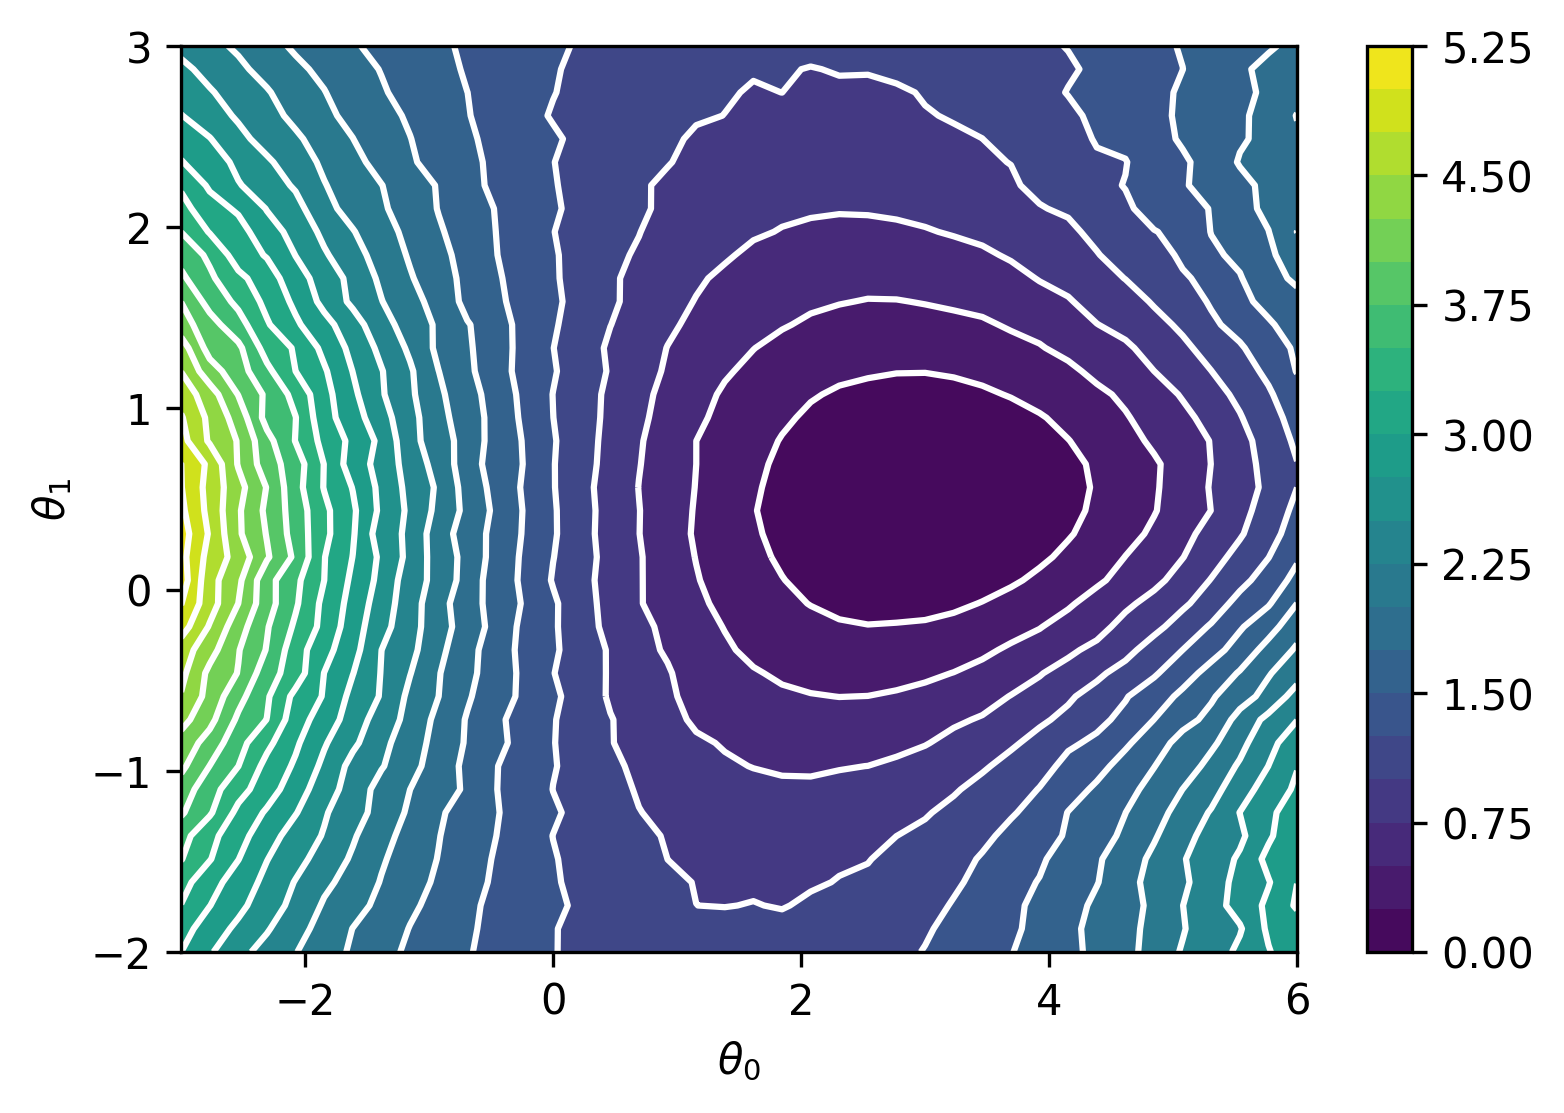

In [14]:
def plot_landscape(ax=None):
    ax = plt.gca() if ax==None else ax
    nlevels = 20  # number of isolines to be plotted
    X,Y = np.meshgrid(theta0s, theta1s, indexing='ij')

    im = ax.contourf(X, Y, cost, nlevels)
    plt.colorbar(im)
    ax.contour(X, Y, cost, nlevels, colors="white")  # to highlight the isolines
    ax.set_xlabel(r'$\theta_0$')
    ax.set_ylabel(r'$\theta_1$')
   
plot_landscape()

### Stochastic gradient descent

We need to compute the gradient of that function. The gradient is a vector which components
are the partial derivatives respect to each parameter.

$$\vec{\nabla} f(x) = \left( \frac{\partial f(x)}{\partial \, \theta_0} \; , \;  \dots \; , \; \frac{\partial f(x)}{\partial \, \theta_i} \; , \; \dots \; , \; \frac{\partial f(x)}{\partial \, \theta_N} \right)$$

where $f(x)$ depends on different parameters $\theta_i$ ; ($i=0\dots N$).

In this particular case

$$\vec{\nabla} f(x) = \left( \frac{1}{(x - \theta_1)^2 + 1} \; , \; \frac{+2(x-\theta_1)\theta_0}{\left[(x-\theta_1)^2+1\right]^2}  \right)$$

In [10]:
def f_grad(thetas, x):
    """ thetas is an array containing the value of the parameters
        x is an array of samples where to evaluate the gradient
    
        Return the gradient of f with respect to theta parameters.
        This is a vector of length equal to the number of
        thetas parameters and evaluated on the x samples,
        resulting on a matrix of shape (n_thetas, n_samples)
    """
    df_dt0 = 1./ ( (x-thetas[1])**2 + 1.0)  # partial derivative respect to theta0
    df_dt1 = 2 * (x-thetas[1]) * thetas[0] / ( (x-thetas[1])**2 + 1.0 )**2  # to th1
    
    return np.array([df_dt0, df_dt1])

Let's do a gradient descent and, for each step, plot the (sampled) true function vs. the fitting function.
Also plot the current location of parameters theta on the landscape based on the averaged cost function.

Remmember that one step on the stochastic gradient descent is

$$\omega_i = \omega_i - \eta \, \hat{C} \, \frac{\partial f(x)}{\partial \omega_i} \quad ; \quad (i=0,1)$$

where $\eta$ is the learning rate.

In [16]:
# functions to clean output and be able to update the display (simple animation)
from IPython.display import clear_output

# do many steps of stochastic gradient descent,
# continue showing the comparison!
eta = .3  # 0.3  # "learning rate" (gradient descent step size)
nsamples = 10   # stochastic x samples used per step
nsteps = 100    # steps to do, it can be replaced with a validation criteria
time_step = 0.01 # the updating time for animation

for n in range(nsteps):  # it can be replaced with a while with some criteria

    x = samples(nsamples)  # get random samples (training set)
    
    deviation = f(fit_thetas, x) - f(true_thetas, x)  # cost for every x (vector)
    deviation = deviation[None, :]  # from row-vector to column-vector
    
    gradient = f_grad(fit_thetas, x)  # gradient for every x: shape=(2,nsamples)
    
    descend = np.average(deviation*gradient, axis=1)  # averaging for all x
    
    # do one gradient descent step:
    fit_thetas -= eta * descend
    
    clear_output(wait=True)
    fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(8,2))
    
    plot_curves(x, ax[0])
    plot_landscape(ax[1])

    ax[1].scatter([fit_thetas[0]], [fit_thetas[1]], color="orange")   
    ax[1].arrow(*fit_thetas,*(-eta*descend), color='yellow',
                width=0.05, length_includes_head=True)
    
    plt.show()
#     sleep(time_step)

KeyboardInterrupt: 

### [HOMEWORK]: Your own examples 

Consider for example a parametrized function

      np.sin(theta[1]*(x-theta[0]))/(10.0+x**2)

and a true function (in the shape of a wavepacket)

      np.sin(3.0*(x-1.5))/(10.0+x**2)

1. Plot and understand the function

2. Plot and understand the cost function

3. Run the fitting (find suitable values for eta etc.)

## Backpropagation



### Implement backpropagation for a general (fully connected) network

Let's define a function which returns the activation and its derivative. This will be useful to do both things at once

In [17]:
def net_f_df(z):  # calculate f(z) and f'(z)
    val = 1/(1+np.exp(-z))  # sigmoid
    return val, np.exp(-z)*(val**2)  # return both f and f'

Now, a forward step will return the values after a layer and their derivatives

In [18]:
def forward_step(y, w, b):  # calculate values in next layer, from input y
    z = np.dot(y, w) + b  # w=weights, b=bias vector for next layer
    return net_f_df(z)  # apply nonlinearity and return result

In [19]:
def apply_net_df(y_in, weights, biases, n_layers):  # one forward pass through the network

    global y_layer, df_layer # for storing y-values and df/dz values
    
    y = y_in  # start with input values
    y_layer[0] = y
    for j in range(n_layers):  # loop through all layers
        # j=0 corresponds to the first layer above the input
        y, df = forward_step(y, weights[j], biases[j])  # one step
        df_layer[j] = df  # store f'(z) [needed later in backprop]
        y_layer[j+1] = y  # store f(z) [also needed in backprop]        
    return y

In [20]:
def apply_net_simple(y_in, weights, biases, n_layers):  # one forward pass through the network
    # no storage for backprop (this is used for simple tests)

    y = y_in  # start with input values
#     y_layer[0] = y
    for j in range(n_layers):  # loop through all layers
        # j=0 corresponds to the first layer above the input
        y, df = forward_step(y, weights[j], biases[j]) # one step
    return y

In [21]:
def backward_step(delta, w, df): 
    # delta at layer N, of batchsize x layersize(N))
    # w between N-1 and N [layersize(N-1) x layersize(N) matrix]
    # df = df/dz at layer N-1, of batchsize x layersize(N-1)
    return np.dot(delta, np.transpose(w))*df

$$\frac{\partial C}{\partial \omega} = $$

$$\frac{\partial C}{\partial b} = $$

$$\Delta = $$

In [22]:
def backprop(y_target, weights, biases, n_layers, batchsize): # one backward pass through the network
    # the result will be the 'dw_layer' matrices that contain
    # the derivatives of the cost function with respect to
    # the corresponding weight
    global y_layer, df_layer
    global dw_layer, db_layer # dCost/dw and dCost/db (w,b=weights,biases)
    
    delta = (y_layer[-1]-y_target) * df_layer[-1]
    dw_layer[-1] = np.dot(np.transpose(y_layer[-2]), delta) / batchsize
    db_layer[-1] = delta.sum(0) / batchsize
    
    for j in range(n_layers-1):
        delta = backward_step(delta, weights[-1-j], df_layer[-2-j])
        dw_layer[-2-j] = np.dot(np.transpose(y_layer[-3-j]), delta)
        db_layer[-2-j] = delta.sum(0) / batchsize

In [23]:
def gradient_step(eta, weights, biases, n_layers):  # update weights & biases (after backprop!)
    
    for j in range(n_layers):
        weights[j] -= eta * dw_layer[j]
        biases[j] -= eta * db_layer[j]
        
    return weights, biases

In [24]:
def train_net(y_in, y_target, eta, weights, biases, n_layers, batchsize): # one full training batch
    # y_in is an array of size batchsize x (input-layer-size)
    # y_target is an array of size batchsize x (output-layer-size)
    # eta is the stepsize for the gradient descent
    
    y_out_result = apply_net_df(y_in, weights, biases, n_layers)
    
    backprop(y_target, weights, biases, n_layers, batchsize)
    weights, biases = gradient_step(eta, weights, biases, n_layers)
    
    cost = ((y_target-y_out_result)**2).sum() / batchsize
    
    return cost, y_out_result, weights, biases

### Setup for a particular set of layer sizes

In [25]:
# set up all the weights and biases

numLayers = 3  # does not count input-layer (but does count output)
layerSizes = [2,20,30,1]  # input-layer,hidden-1,hidden-2,...,output-layer

# initialize random weights and biases for all layers (except input of course)
Weights = [np.random.uniform(low=-1, high=+1, size=[ layerSizes[j], layerSizes[j+1] ]) for j in range(numLayers)]
Biases = [np.random.uniform(low=-1, high=+1, size=layerSizes[j+1]) for j in range(numLayers)]

# define the batchsize
batchsize=100

In [26]:
# set up all the helper variables

y_layer = [np.zeros([batchsize, layerSizes[j]]) for j in range(numLayers+1)]
df_layer = [np.zeros([batchsize, layerSizes[j+1]]) for j in range(numLayers)]
dw_layer = [np.zeros([layerSizes[j], layerSizes[j+1]]) for j in range(numLayers)]
db_layer = [np.zeros(layerSizes[j+1]) for j in range(numLayers)]

### Train the net on one single batch repeatedly (not so good)

Let's define a toy model of random numbers

In [27]:
y_in = np.random.uniform(low=-1, high=+1, size=[batchsize, layerSizes[0]])
y_target = np.random.uniform(low=-1, high=+1, size=[batchsize, layerSizes[-1]])

In [28]:
# one training step:
cost, y_out_result, Weights, Biases = train_net(y_in, y_target, .0001, Weights, Biases, numLayers, batchsize)  # returns cost function value
print(cost)

1.2715034731482866


In [29]:
eta = 0.001
batches = 200

costs = np.zeros(batches)  # array to store the costs

for k in range(batches):
    costs[k], y_out_result, Weights, Biases = train_net(y_in, y_target, eta, 
                                                        Weights, Biases, 
                                                        numLayers, batchsize)

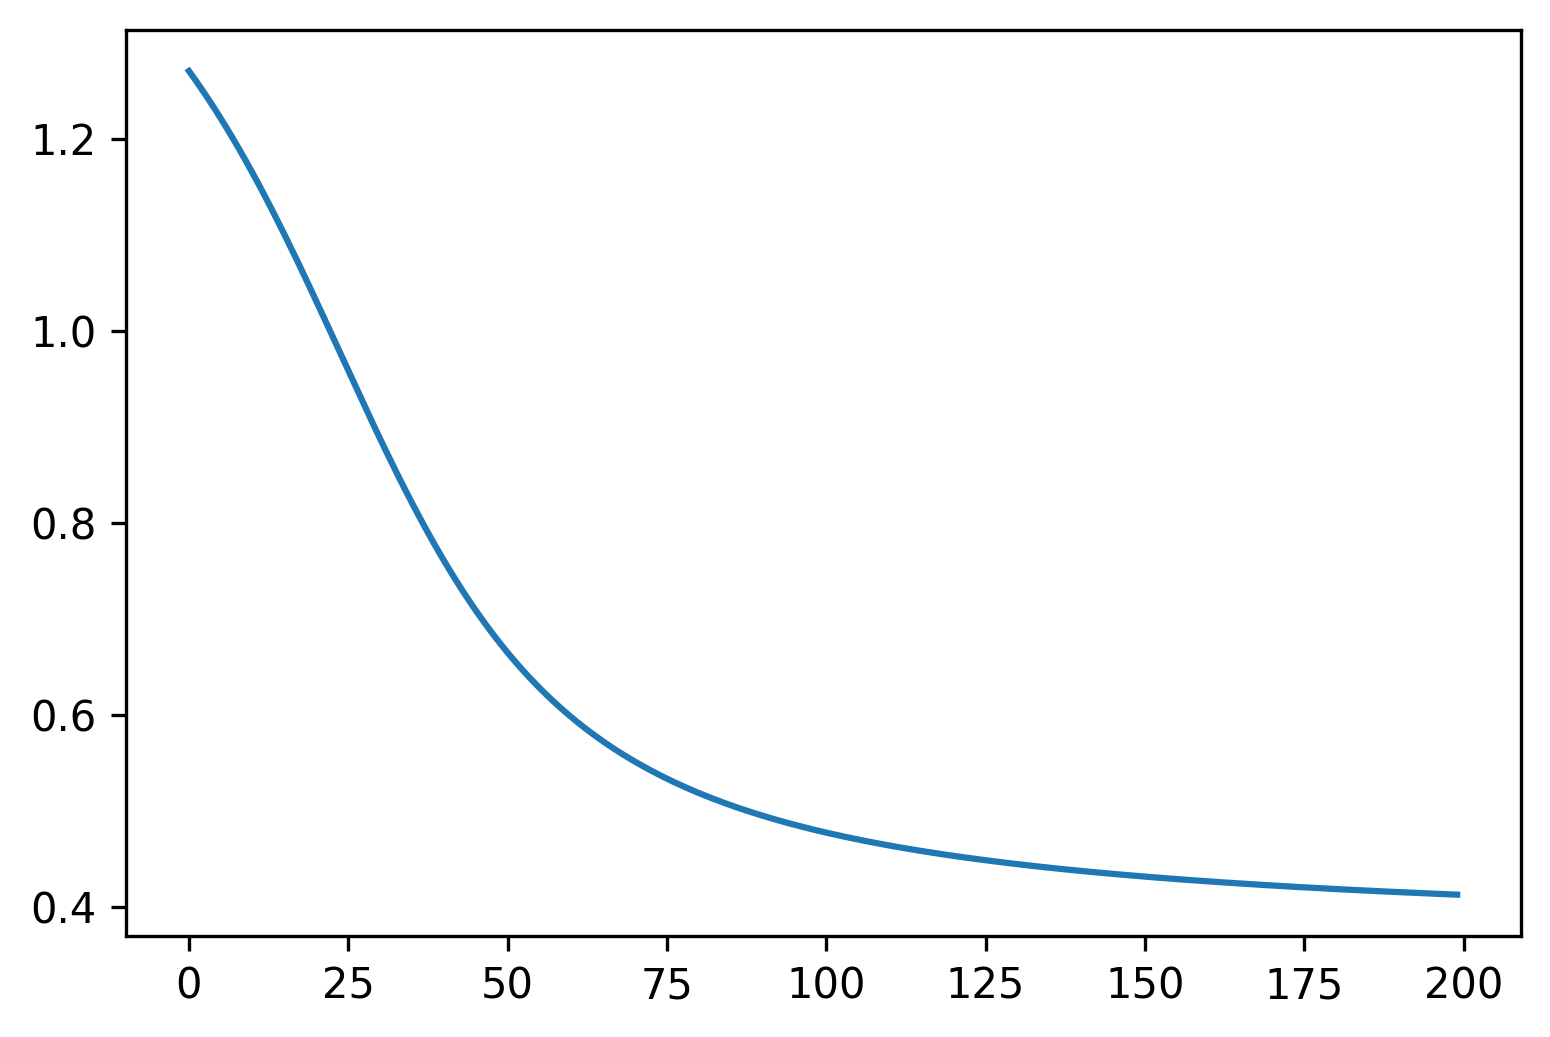

In [30]:
# this will show a very simple decrease, because
# we are not yet stochastically sampling inputs
# (it is always the SAME input! so the network
# only becomes good for that input)
plt.plot(costs)
plt.show()

### Produce random batches: randomly sample a function defined on a 2D square

Let's define a certain 2D function to be trained

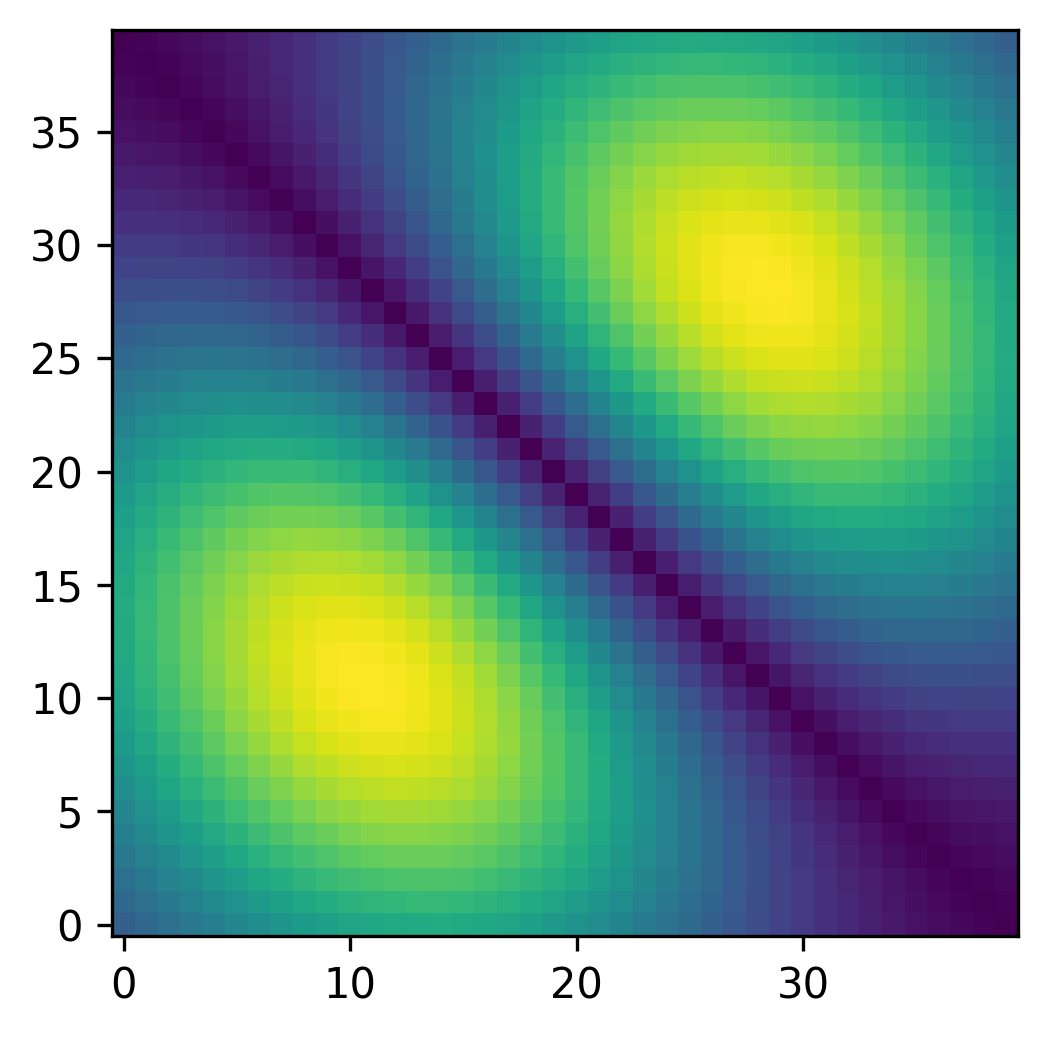

In [31]:
def myFunc(x0,x1):
    r2 = x0**2+x1**2
    return np.exp(-5*r2)*abs(x1+x0)

xrange = np.linspace(-0.5, 0.5, 40)
X0,X1 = np.meshgrid(xrange, xrange)
plt.imshow(myFunc(X0,X1), interpolation='nearest', origin='lower')
plt.show()

Let's define a NN to train and predict that function

In [32]:
# set up all the weights and biases

NumLayers = 2  # does not count input-layer (but does count output)
LayerSizes = [2,100,1]  # input-layer,hidden-1,hidden-2,...,output-layer

Weights = [np.random.uniform(low=-0.1, high=+0.1, size=[LayerSizes[j], LayerSizes[j+1]]) for j in range(NumLayers)]
Biases = [np.zeros(LayerSizes[j+1]) for j in range(NumLayers)]

# set up all the helper variables

y_layer = [np.zeros(LayerSizes[j]) for j in range(NumLayers+1)]
df_layer = [np.zeros(LayerSizes[j+1]) for j in range(NumLayers)]
dw_layer = [np.zeros([LayerSizes[j],LayerSizes[j+1]]) for j in range(NumLayers)]
db_layer = [np.zeros(LayerSizes[j+1]) for j in range(NumLayers)]

# define the batchsize
batchsize = 100

In [33]:
# For a change: Set up rectified linear units (relu) 
# instead of sigmoid
def net_f_df(z):  # calculate f(z) and f'(z)
    val = z*(z>0)
    return val, z>0  # return both f and f'

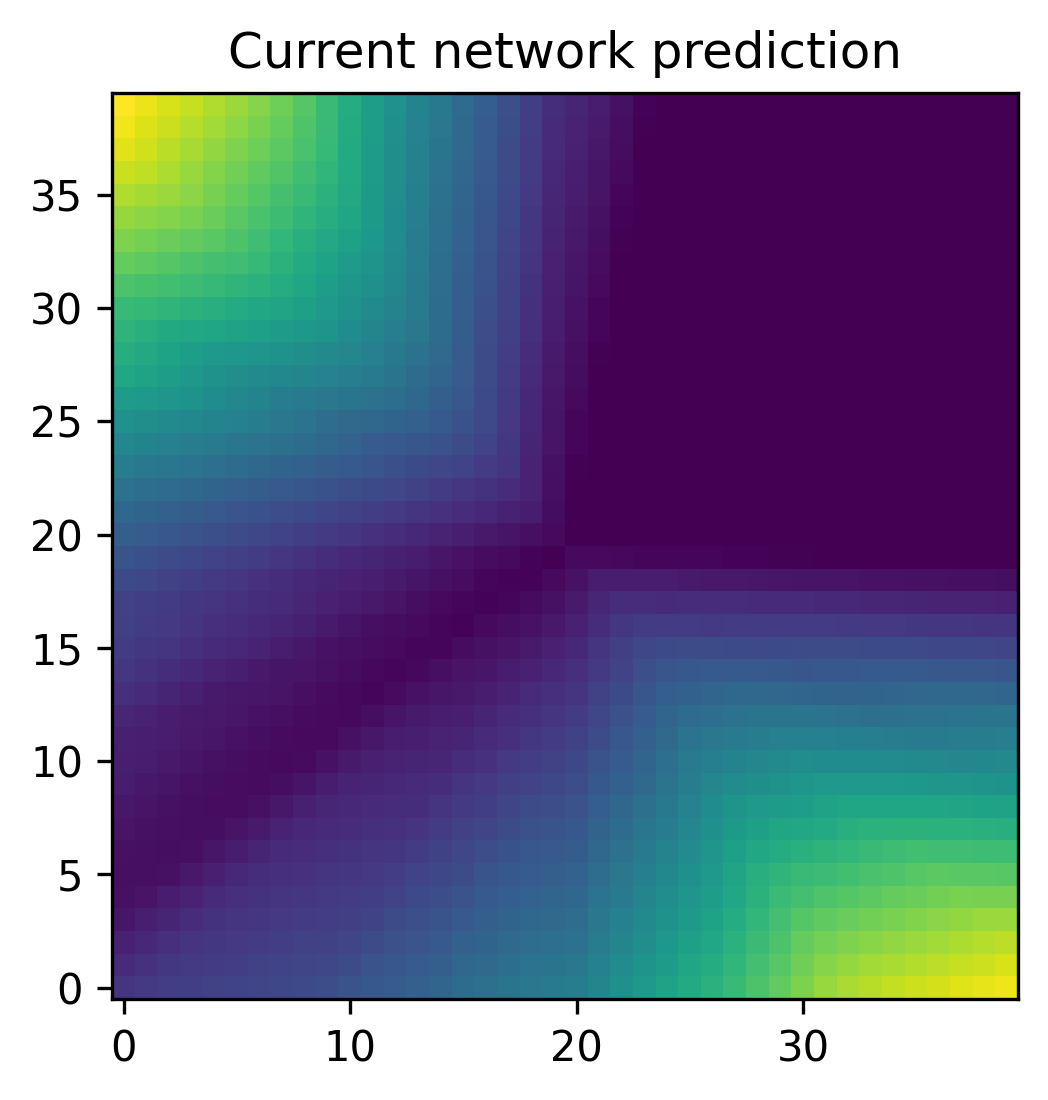

In [34]:
test_batchsize = np.shape(X0)[0]*np.shape(X0)[1]
testsample = np.zeros([test_batchsize,2])
testsample[:,0] = X0.flatten()
testsample[:,1] = X1.flatten()

def evaluate_current_state(samples, Weights, Biases, NumLayers, ax=None):
    # try to evaluate the (randomly initialized) network
    # on some area in the 2D plane
    ax = plt.gca() if ax == None else ax

    testoutput = apply_net_simple(samples, Weights, Biases, NumLayers)
    myim = ax.imshow(np.reshape(testoutput,np.shape(X0)), origin='lower', interpolation='none')
    ax.set_title("Current network prediction")
    
evaluate_current_state(testsample, Weights, Biases, NumLayers)

In [35]:
def make_batch(batchsize):
    
    inputs = np.random.uniform(low=-0.5, high=+0.5, size=[batchsize,2])
    targets = np.zeros([batchsize,1])  # must have right dimensions
    targets[:,0] = myFunc(inputs[:,0], inputs[:,1])
    
    return inputs,targets

In [36]:
eta = 0.01 # learning rate
nsteps = 100

costs = np.zeros(nsteps)
for j in range(nsteps):
    clear_output(wait=True)
    fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(8,4))  # prepare figure
    
    # the crucial lines:
    y_in, y_target = make_batch(batchsize)  # random samples (points in 2D)
    costs[j], y_out_result, Weights, Biases = train_net(y_in,y_target,eta, Weights, Biases, NumLayers, batchsize)  # train network (one step, on this batch)
    testoutput = apply_net_simple(testsample, Weights, Biases, NumLayers)  # check the new network output in the plane
    
    evaluate_current_state(testsample, Weights, Biases, NumLayers, ax[1])
   
    ax[0].plot(costs)
    ax[0].set_title("Cost during training")
    ax[0].set_xlabel("number of batches")
    
    plt.show()
    sleep(0.01)

KeyboardInterrupt: 

## Train net to reproduce an image

In [37]:
import imageio

# load the pixel image!
face =imageio.imread('Smiley.png')
pixel_image=np.transpose(face[:,:,0]) # have to transpose...
pixel_image=pixel_image[:,::-1] # and flip... to get the right view!
pixel_image-=pixel_image.min()
pixel_image=(pixel_image.astype(dtype='float'))/pixel_image.max() # normalize between 0 and 1!
Npixels=np.shape(pixel_image)[0] # assuming a square image!

In [38]:
# the function we want to have (desired outcome)
# this picks the pixels from the image
def myFunc(x0,x1):
    global pixel_image, Npixels
    # convert to integer coordinates (assuming input is 0..1)
    x0int=(x0*Npixels*0.9999).astype(dtype='int')
    x1int=(x1*Npixels*0.9999).astype(dtype='int')
    return(pixel_image[x0int,x1int]) # extract color values at these pixels


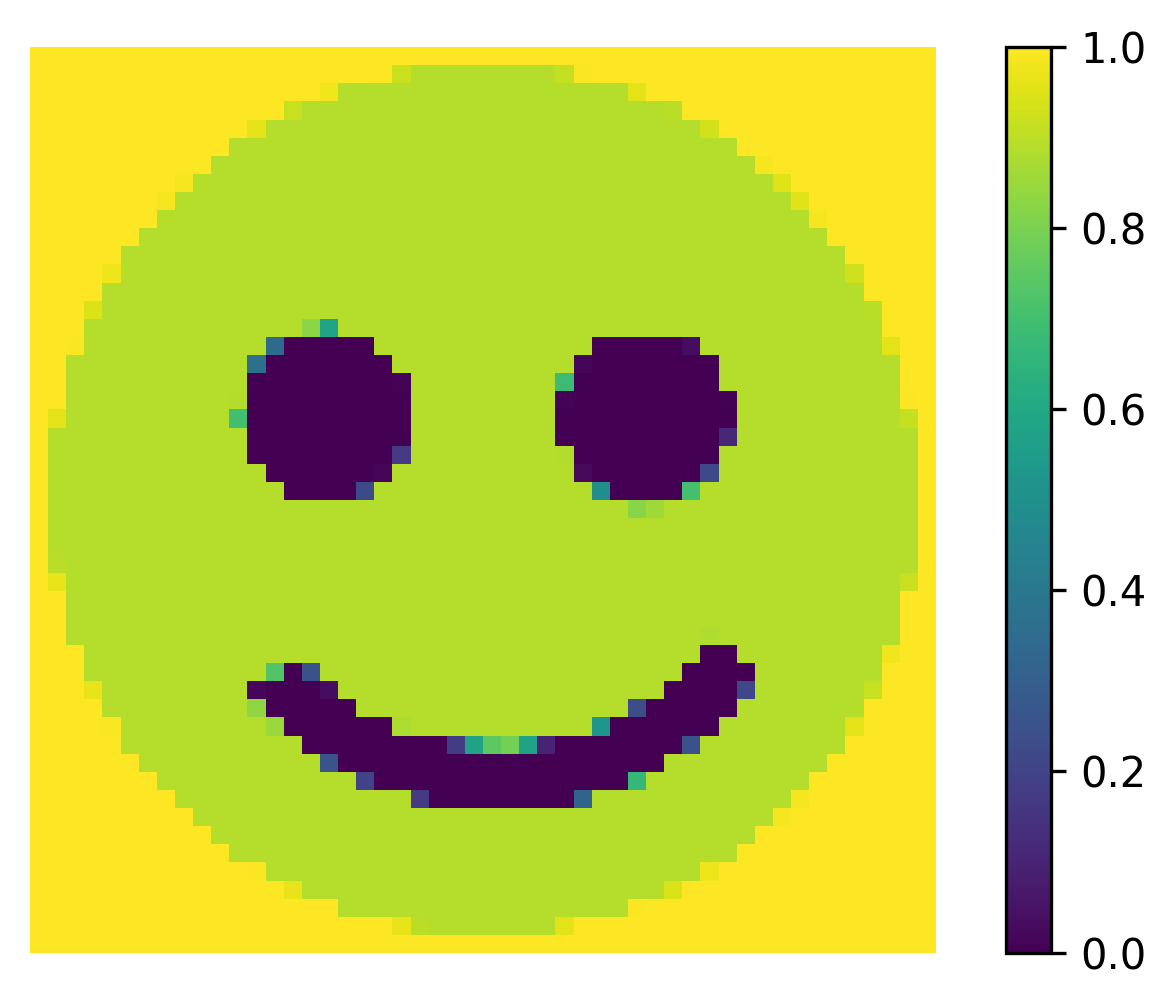

In [39]:
# check that this works:
Npixels_Test=50 # do the test output on a low-res grid! (saves time)
xrange=np.linspace(0,1,Npixels_Test)
X0,X1=np.meshgrid(xrange,xrange)
plt.imshow(myFunc(X0,X1),interpolation='nearest',origin='lower')
plt.axis('off')
plt.colorbar()
plt.show()

In [40]:
def net_f_df(z):  # calculate f(z) and f'(z)
    val = 1/(1+np.exp(-z))  # sigmoid
    return val, np.exp(-z)*(val**2)  # return both f and f'

In [41]:
# set up all the weights and biases

NumLayers=3 # does not count input-layer (but does count output)
LayerSizes=[2,150,100,1] # input-layer,hidden-1,hidden-2,...,output-layer

Weights=[5*(1./np.sqrt(LayerSizes[j]))*np.random.randn(LayerSizes[j],LayerSizes[j+1]) for j in range(NumLayers)]
Biases=[np.zeros(LayerSizes[j+1]) for j in range(NumLayers)]

# set up all the helper variables

y_layer=[np.zeros(LayerSizes[j]) for j in range(NumLayers+1)]
df_layer=[np.zeros(LayerSizes[j+1]) for j in range(NumLayers)]
dw_layer=[np.zeros([LayerSizes[j],LayerSizes[j+1]]) for j in range(NumLayers)]
db_layer=[np.zeros(LayerSizes[j+1]) for j in range(NumLayers)]

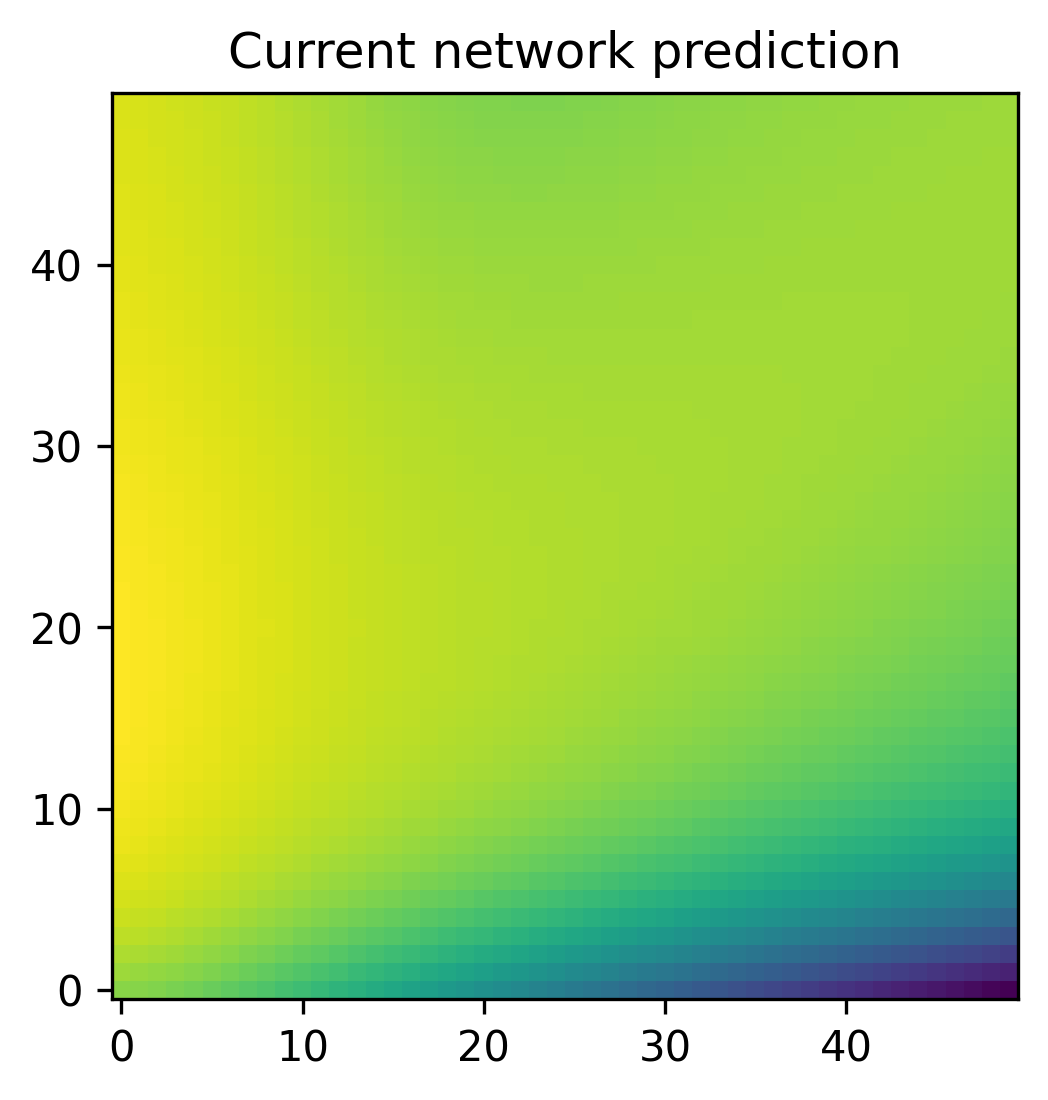

In [42]:
# a 'test' batch that includes all the points on the image grid
test_batchsize=np.shape(X0)[0]*np.shape(X0)[1]
testsample=np.zeros([test_batchsize,2])
testsample[:,0]=X0.flatten()
testsample[:,1]=X1.flatten()

evaluate_current_state(testsample, Weights, Biases, NumLayers)

You need about a million or so samples to get something reasonable looking
i.e. at least resembling the shape

EXERCISE: find better parameters, for weight initialization, for learning rate, for batchsize etc., to reduce the number of samples needed!

In [43]:
# # set up all the weights and biases

# NumLayers=3 # does not count input-layer (but does count output)
# LayerSizes=[2,150,100,1] # input-layer,hidden-1,hidden-2,...,output-layer

# Weights=[5*(1./sqrt(LayerSizes[j]))*random.randn(LayerSizes[j],LayerSizes[j+1]) for j in range(NumLayers)]
# Biases=[zeros(LayerSizes[j+1]) for j in range(NumLayers)]

# # set up all the helper variables

# y_layer=[zeros(LayerSizes[j]) for j in range(NumLayers+1)]
# df_layer=[zeros(LayerSizes[j+1]) for j in range(NumLayers)]
# dw_layer=[zeros([LayerSizes[j],LayerSizes[j+1]]) for j in range(NumLayers)]
# db_layer=[zeros(LayerSizes[j+1]) for j in range(NumLayers)]

samples_count=0

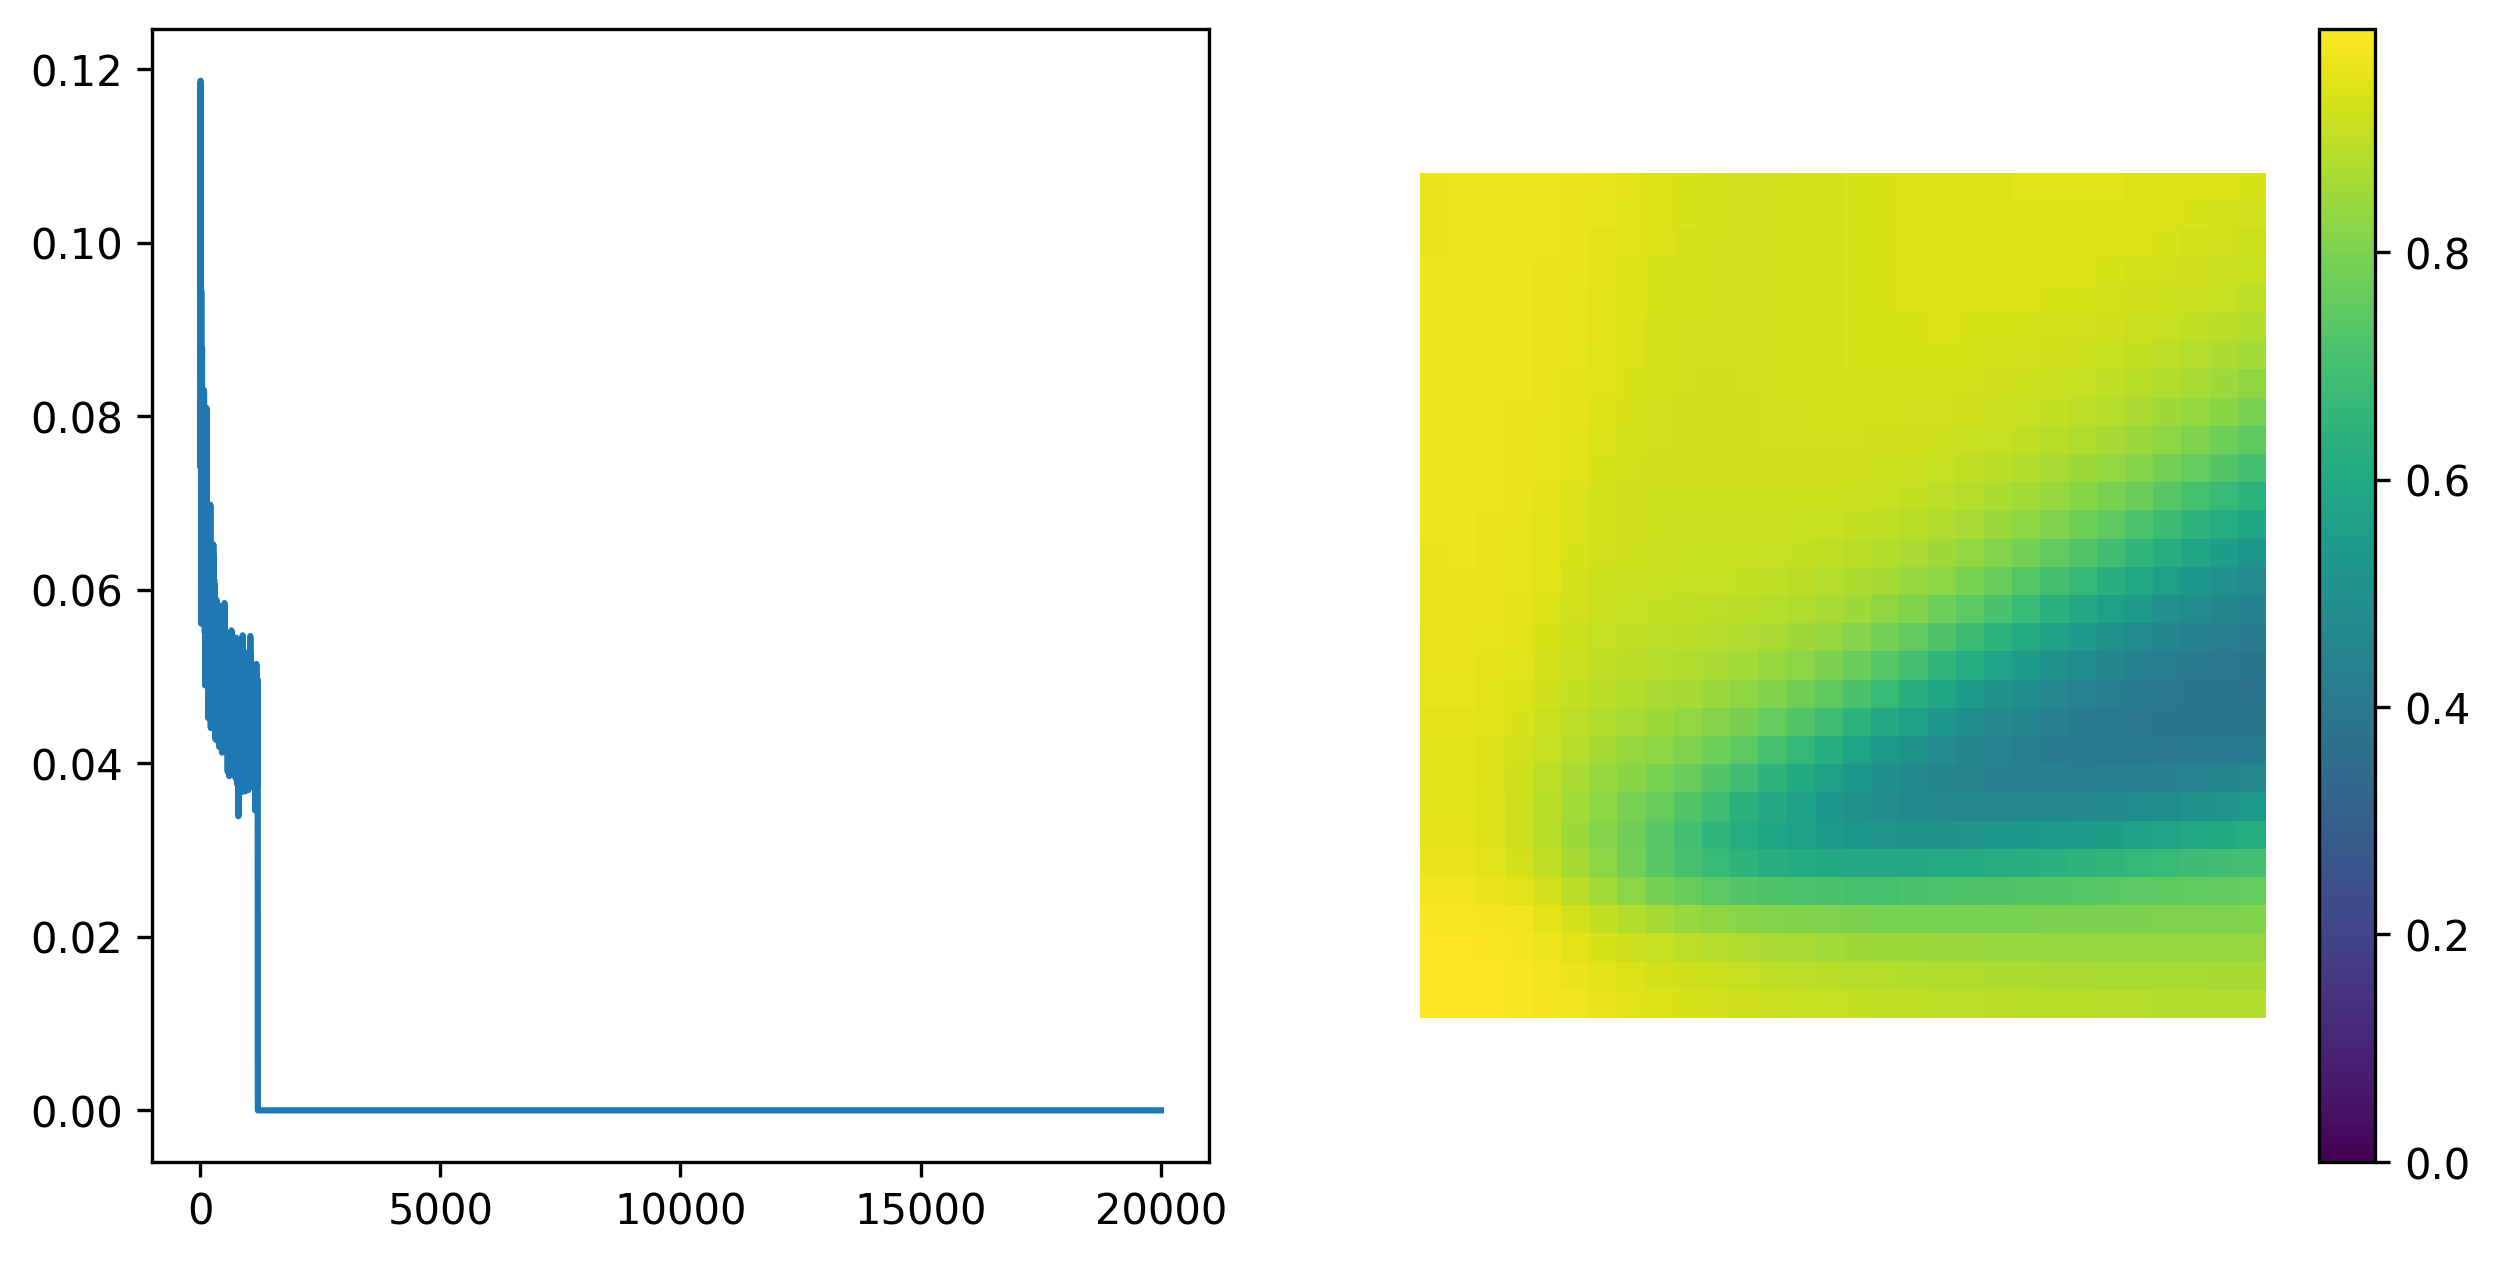

In [ ]:

# test sample
Npixels_Test=30 # do the test output on a low-res grid! (saves time)
xrange=np.linspace(0,1,Npixels_Test)
X0,X1=np.meshgrid(xrange,xrange)
test_batchsize=np.shape(X0)[0]*np.shape(X0)[1]
testsample=np.zeros([test_batchsize,2])
testsample[:,0]=X0.flatten()
testsample[:,1]=X1.flatten()

# parameters
eta=0.01
nsteps=20000
nskip_steps=100
batchsize=1000


costs=np.zeros(nsteps)

for j in range(nsteps):
    y_in,y_target=make_batch(batchsize)
    costs[j], y_out_result, Weights, Biases=train_net(y_in,y_target,eta, Weights, Biases, NumLayers, batchsize)
    samples_count+=batchsize
    testoutput=apply_net_simple(testsample, Weights, Biases, NumLayers)  
    if j%nskip_steps==0: # time to plot again!
        clear_output(wait=True)
        fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(10,5))
        img=ax[1].imshow(np.reshape(testoutput,np.shape(X0)),origin='lower',interpolation='nearest',vmin=0)
        fig.colorbar(img,ax=ax[1])
        ax[1].axis('off') # no axes
        ax[0].plot(costs)
        plt.show()

AllOldWeights=Weights # backup all weights
OldWeights=Weights[-1] # especially of last layer, which we will modify below!

samples_count

In [ ]:
# save the resulting network
#savez_compressed("ImageCompression_Network_Smiley.npz",LayerSizes,Weights,Biases)

In [ ]:
# switch on only individual neurons of last hidden layer
# and plot the resulting pictures in a big 10x10 array!
#data=load("ImageCompression_Network_Smiley.npz")
#Weights=data['arr_1']

Nrow=10
BigImage=zeros([Nrow*Npixels_Test,Nrow*Npixels_Test])
for which in range(100):
    Weights[-1]=OldWeights.copy()
    Weights[-1][0:which-1,:]=0
    Weights[-1][which+1:-1,:]=0
    testoutput=apply_net_simple(testsample)
    row=int(which/Nrow)
    column=which%Nrow
    BigImage[Npixels_Test*row:Npixels_Test*(row+1),Npixels_Test*column:Npixels_Test*(column+1)]=reshape(testoutput,shape(X0))
    #print(row,column)
myim=plt.imshow(BigImage,origin='lower',interpolation='nearest',vmin=0.0,vmax=1.0)
plt.axis('off')
plt.show()